In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Đường dẫn file (dùng raw string để tránh lỗi)
FILE_PATH = r"D:\OneDrive\Máy tính\nckh (3)\CA_Weather_Fire_Dataset_1984-2025_clean_chacchanluon.csv"

# Đọc dữ liệu
df = pd.read_csv(FILE_PATH)

print("Kích thước dữ liệu:", df.shape)
print(df.head())


Kích thước dữ liệu: (14988, 14)
         DATE  PRECIPITATION  MAX_TEMP  MIN_TEMP  AVG_WIND_SPEED  \
0  1984-01-01            0.0      79.0      51.0            4.70   
1  1984-01-02            0.0      71.0      46.0            5.59   
2  1984-01-03            0.0      70.0      47.0            5.37   
3  1984-01-04            0.0      76.0      45.0            4.70   
4  1984-01-05            0.0      74.0      49.0            5.14   

   FIRE_START_DAY  YEAR  TEMP_RANGE  WIND_TEMP_RATIO  MONTH  SEASON  \
0           False  1984        28.0         0.059494      1  Winter   
1           False  1984        25.0         0.078732      1  Winter   
2           False  1984        23.0         0.076714      1  Winter   
3           False  1984        31.0         0.061842      1  Winter   
4           False  1984        25.0         0.069459      1  Winter   

   LAGGED_PRECIPITATION  LAGGED_AVG_WIND_SPEED  DAY_OF_YEAR  
0                   0.0                  4.700            1  
1       

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu
df = pd.read_csv("CA_Weather_Fire_Dataset_1984-2025_clean_chacchanluon.csv")

# Chuyển DATE sang datetime
df["DATE"] = pd.to_datetime(df["DATE"])

# Sắp xếp theo thời gian
df = df.sort_values("DATE")

# Đặt DATE làm index chuỗi thời gian
df.set_index("DATE", inplace=True)

print(df.head())
print(df.info())


            PRECIPITATION  MAX_TEMP  MIN_TEMP  AVG_WIND_SPEED  FIRE_START_DAY  \
DATE                                                                            
1984-01-01            0.0      79.0      51.0            4.70           False   
1984-01-02            0.0      71.0      46.0            5.59           False   
1984-01-03            0.0      70.0      47.0            5.37           False   
1984-01-04            0.0      76.0      45.0            4.70           False   
1984-01-05            0.0      74.0      49.0            5.14           False   

            YEAR  TEMP_RANGE  WIND_TEMP_RATIO  MONTH  SEASON  \
DATE                                                           
1984-01-01  1984        28.0         0.059494      1  Winter   
1984-01-02  1984        25.0         0.078732      1  Winter   
1984-01-03  1984        23.0         0.076714      1  Winter   
1984-01-04  1984        31.0         0.061842      1  Winter   
1984-01-05  1984        25.0         0.069459   

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20124\3027588322.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fire_ts.resample("M").sum().plot()


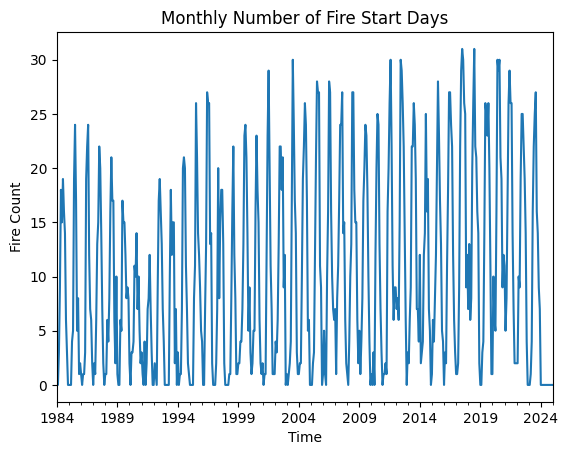

In [ ]:
fire_ts = df["FIRE_START_DAY"].astype(int)

plt.figure()
fire_ts.resample("M").sum().plot()
plt.title("Tổng quan chuỗi thời gian cháy rừng")
plt.xlabel("Time")
plt.ylabel("Fire Count")
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1368\309157051.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fire_ma = fire_ts.resample("M").sum().rolling(window=12).mean()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1368\309157051.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fire_ts.resample("M").sum().plot(label="Monthly Fires")


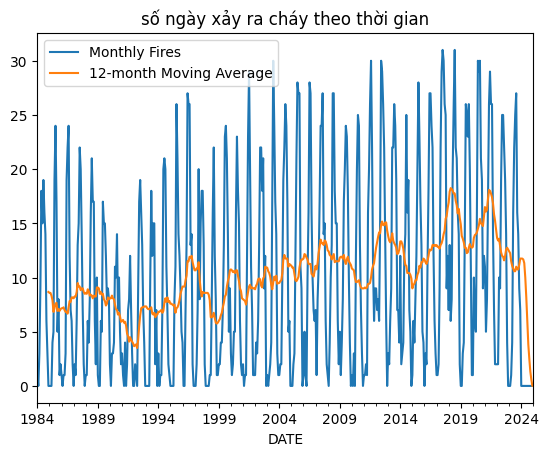

In [17]:
fire_ma = fire_ts.resample("M").sum().rolling(window=12).mean()

plt.figure()
fire_ts.resample("M").sum().plot(label="Monthly Fires")
fire_ma.plot(label="12-month Moving Average")
plt.legend()
plt.title("số ngày xảy ra cháy theo thời gian")
plt.show()


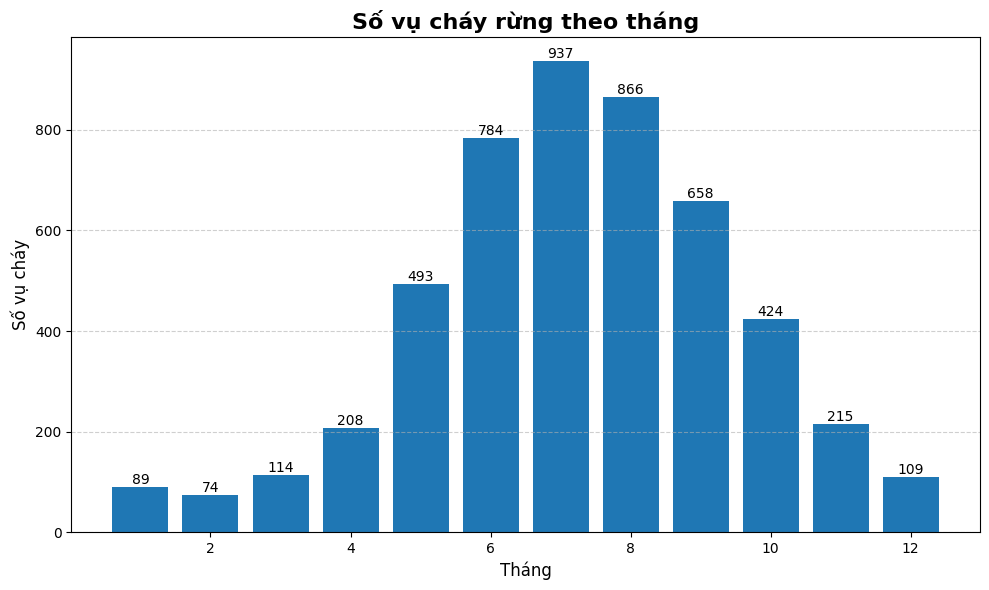

In [20]:
import matplotlib.pyplot as plt

# Tổng số vụ cháy theo tháng
monthly_fire = df.groupby("MONTH")["FIRE_START_DAY"].sum()

plt.figure(figsize=(10, 6))

bars = plt.bar(
    monthly_fire.index,
    monthly_fire.values
)

# Tiêu đề & nhãn
plt.title("Số vụ cháy rừng theo tháng", fontsize=16, fontweight="bold")
plt.xlabel("Tháng", fontsize=12)
plt.ylabel("Số vụ cháy", fontsize=12)

# Xoay nhãn tháng cho dễ đọc
plt.xticks(rotation=0)

# Thêm lưới nhẹ
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Hiển thị giá trị trên đầu mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.tight_layout()
plt.show()


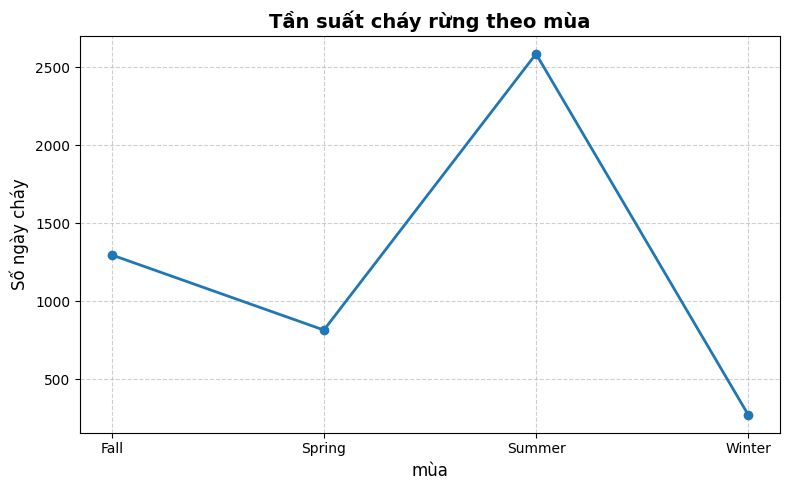

In [24]:
import matplotlib.pyplot as plt

season_fire = df.groupby("SEASON")["FIRE_START_DAY"].sum()

plt.figure(figsize=(8, 5))

plt.plot(
    season_fire.index,
    season_fire.values,
    marker="o",
    linestyle="-",
    linewidth=2
)

plt.title("Tần suất cháy rừng theo mùa", fontsize=14, fontweight="bold")
plt.xlabel("mùa", fontsize=12)
plt.ylabel("Số ngày cháy", fontsize=12)

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()




C:\Users\ASUS\AppData\Local\Temp\ipykernel_20124\25970345.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_fire_ts = fire_ts.resample("M").sum()


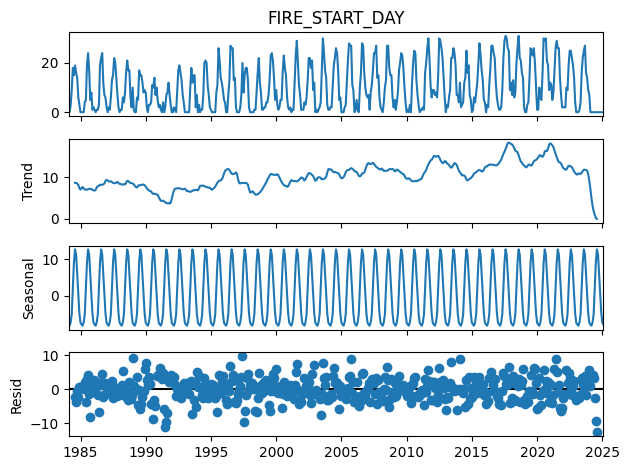

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

monthly_fire_ts = fire_ts.resample("M").sum()

decomposition = seasonal_decompose(monthly_fire_ts, model="additive")

decomposition.plot()
plt.show()


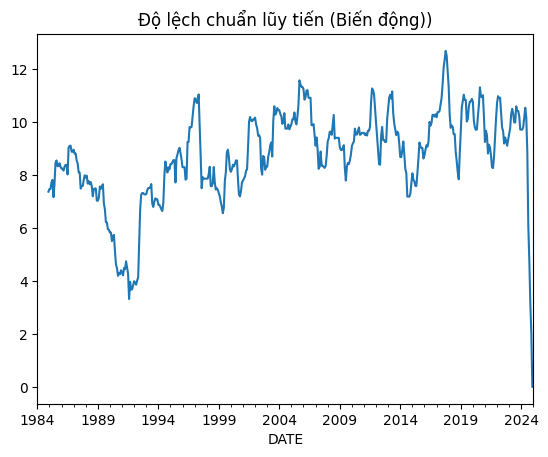

In [27]:
rolling_std = monthly_fire_ts.rolling(window=12).std()

plt.figure()
rolling_std.plot()
plt.title("Độ lệch chuẩn lũy tiến (Biến động))")
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_20124\3938783468.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rain_ts = df["PRECIPITATION"].resample("M").mean()


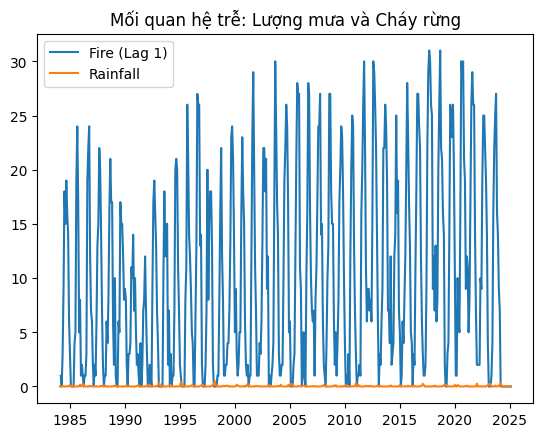

In [28]:
rain_ts = df["PRECIPITATION"].resample("M").mean()

plt.figure()
plt.plot(monthly_fire_ts.shift(1), label="Fire (Lag 1)")
plt.plot(rain_ts, label="Rainfall")
plt.legend()
plt.title("Mối quan hệ trễ: Lượng mưa và Cháy rừng")
plt.show()


háy rừng vs MƯA GỐC vs MƯA TRỄ

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20124\2556846414.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fire_rain = df.groupby("RAIN_BIN")["FIRE_START_DAY"].mean()


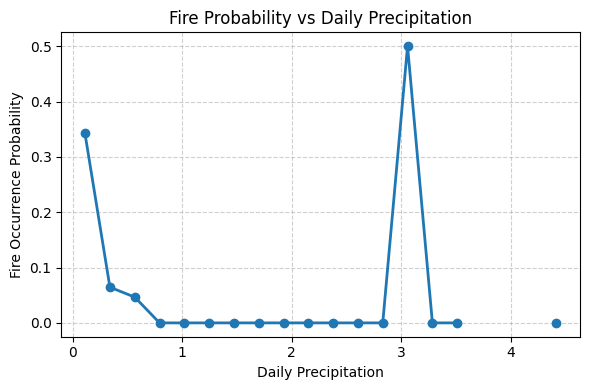

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Chia mưa thành các bin
df["RAIN_BIN"] = pd.cut(df["PRECIPITATION"], bins=20)

fire_rain = df.groupby("RAIN_BIN")["FIRE_START_DAY"].mean()

plt.figure(figsize=(6, 4))
plt.plot(
    [interval.mid for interval in fire_rain.index],
    fire_rain.values,
    marker="o",
    linewidth=2
)

plt.xlabel("Daily Precipitation")
plt.ylabel("Fire Occurrence Probability")
plt.title("Fire Probability vs Daily Precipitation")

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_20124\3093811211.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fire_lag_rain = df.groupby("LAG_RAIN_BIN")["FIRE_START_DAY"].mean()


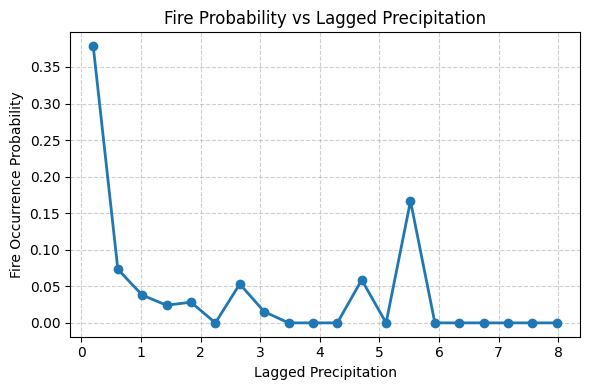

In [51]:
df["LAG_RAIN_BIN"] = pd.cut(df["LAGGED_PRECIPITATION"], bins=20)

fire_lag_rain = df.groupby("LAG_RAIN_BIN")["FIRE_START_DAY"].mean()

plt.figure(figsize=(6, 4))
plt.plot(
    [interval.mid for interval in fire_lag_rain.index],
    fire_lag_rain.values,
    marker="o",
    linewidth=2
)

plt.xlabel("Lagged Precipitation")
plt.ylabel("Fire Occurrence Probability")
plt.title("Fire Probability vs Lagged Precipitation")

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


Cháy rừng vs NHIỆT ĐỘ (NGƯỠNG NGUY HIỂM)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20124\2142181347.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fire_rate = df.groupby("TEMP_BIN")["FIRE_START_DAY"].mean()


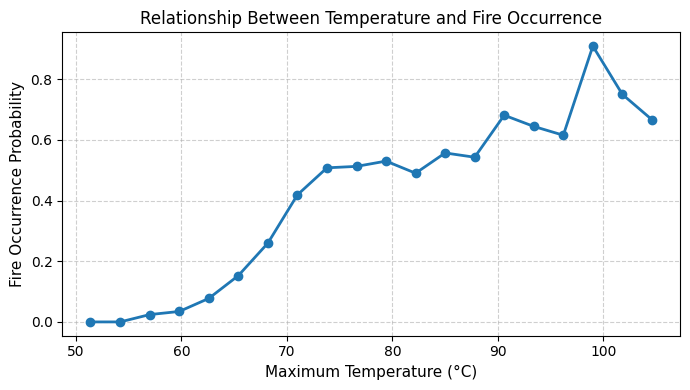

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Chia nhiệt độ thành các khoảng
df["TEMP_BIN"] = pd.cut(df["MAX_TEMP"], bins=20)

# Tính xác suất cháy trung bình theo mỗi khoảng nhiệt độ
fire_rate = df.groupby("TEMP_BIN")["FIRE_START_DAY"].mean()

# Lấy trung điểm mỗi bin để vẽ cho đẹp
temp_mid = [interval.mid for interval in fire_rate.index]

plt.figure(figsize=(7, 4))

plt.plot(
    temp_mid,
    fire_rate.values,
    marker="o",
    linewidth=2
)

plt.xlabel("Maximum Temperature (°C)", fontsize=11)
plt.ylabel("Fire Occurrence Probability", fontsize=11)
plt.title("Relationship Between Temperature and Fire Occurrence", fontsize=12)

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


EDA ĐA BIẾN: NHIỆT ĐỘ × GIÓ (TƯƠNG TÁC)

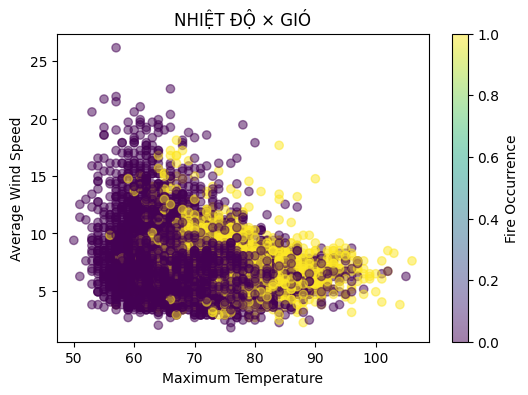

In [43]:
plt.figure(figsize=(6, 4))
plt.scatter(
    df["MAX_TEMP"],
    df["AVG_WIND_SPEED"],
    c=df["FIRE_START_DAY"],
    alpha=0.5
)
plt.xlabel("Maximum Temperature")
plt.ylabel("Average Wind Speed")
plt.title("NHIỆT ĐỘ × GIÓ")
plt.colorbar(label="Fire Occurrence")
plt.show()


Fire vs Temperature

In [55]:
import matplotlib.pyplot as plt

def paper_style_plot(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(7, 4))

    plt.plot(
        x, y,
        marker="o",
        markersize=4,
        markerfacecolor="white",
        markeredgewidth=1.2,
        linewidth=2
    )

    plt.xlabel(xlabel, fontsize=11)
    plt.ylabel(ylabel, fontsize=11)
    plt.title(title, fontsize=12)

    plt.grid(True, linestyle="--", linewidth=0.6, alpha=0.6)

    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    plt.tight_layout()
    plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_20124\3323887226.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fire_temp = df.groupby("TEMP_BIN")["FIRE_START_DAY"].mean()


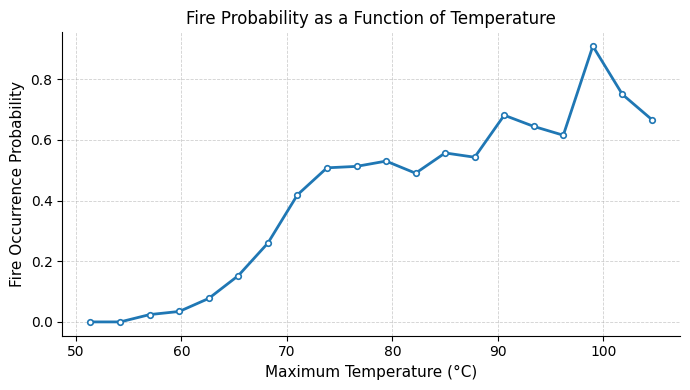

In [57]:
df["TEMP_BIN"] = pd.cut(df["MAX_TEMP"], bins=20)
fire_temp = df.groupby("TEMP_BIN")["FIRE_START_DAY"].mean()

x = [i.mid for i in fire_temp.index]
y = fire_temp.values

paper_style_plot(
    x, y,
    xlabel="Maximum Temperature (°C)",
    ylabel="Fire Occurrence Probability",
    title="Fire Probability as a Function of Temperature"
)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_20124\3538538388.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fire_wind = df.groupby("WIND_BIN")["FIRE_START_DAY"].mean()


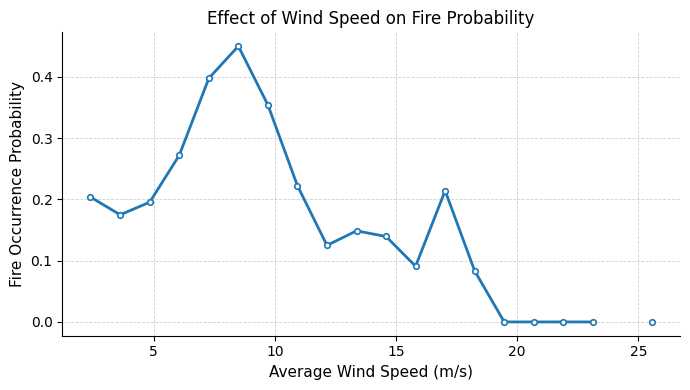

In [58]:
df["WIND_BIN"] = pd.cut(df["AVG_WIND_SPEED"], bins=20)
fire_wind = df.groupby("WIND_BIN")["FIRE_START_DAY"].mean()

x = [i.mid for i in fire_wind.index]
y = fire_wind.values

paper_style_plot(
    x, y,
    xlabel="Average Wind Speed (m/s)",
    ylabel="Fire Occurrence Probability",
    title="Effect of Wind Speed on Fire Probability"
)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_20124\116517293.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fire_dry = df.groupby("DRY_BIN")["FIRE_START_DAY"].mean()


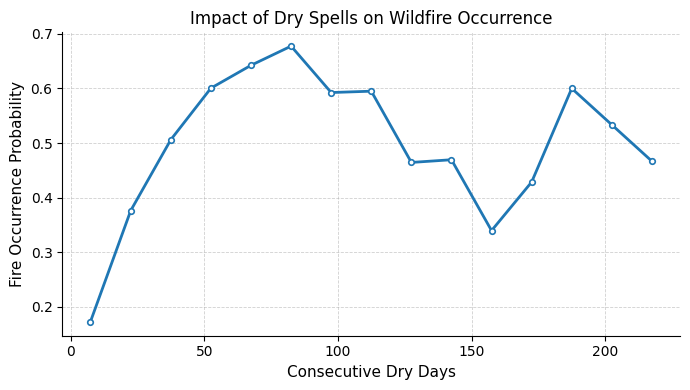

In [59]:
df["DRY_BIN"] = pd.cut(df["dry_days"], bins=15)
fire_dry = df.groupby("DRY_BIN")["FIRE_START_DAY"].mean()

x = [i.mid for i in fire_dry.index]
y = fire_dry.values

paper_style_plot(
    x, y,
    xlabel="Consecutive Dry Days",
    ylabel="Fire Occurrence Probability",
    title="Impact of Dry Spells on Wildfire Occurrence"
)


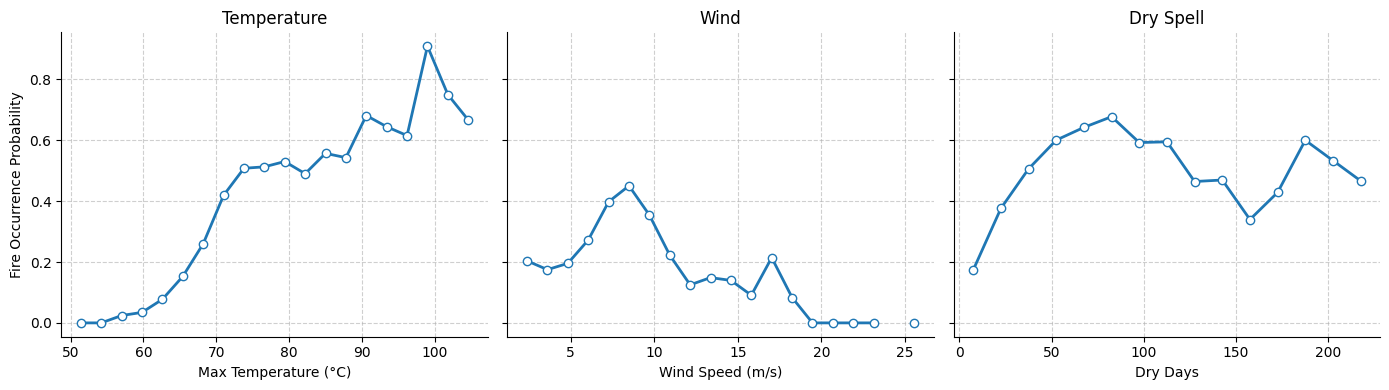

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4), sharey=True)

plots = [
    (fire_temp, "Max Temperature (°C)", "Temperature"),
    (fire_wind, "Wind Speed (m/s)", "Wind"),
    (fire_dry, "Dry Days", "Dry Spell"),
]

for ax, (data, xlabel, title) in zip(axes, plots):
    ax.plot(
        [i.mid for i in data.index],
        data.values,
        marker="o",
        markerfacecolor="white",
        linewidth=2
    )
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.grid(True, linestyle="--", alpha=0.6)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

axes[0].set_ylabel("Fire Occurrence Probability")
plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_3576\1279570114.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette="Oranges", ax=ax1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3576\1279570114.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_ts = df.set_index('DATE').resample('M')['FIRE_START_DAY'].sum().reset_index()


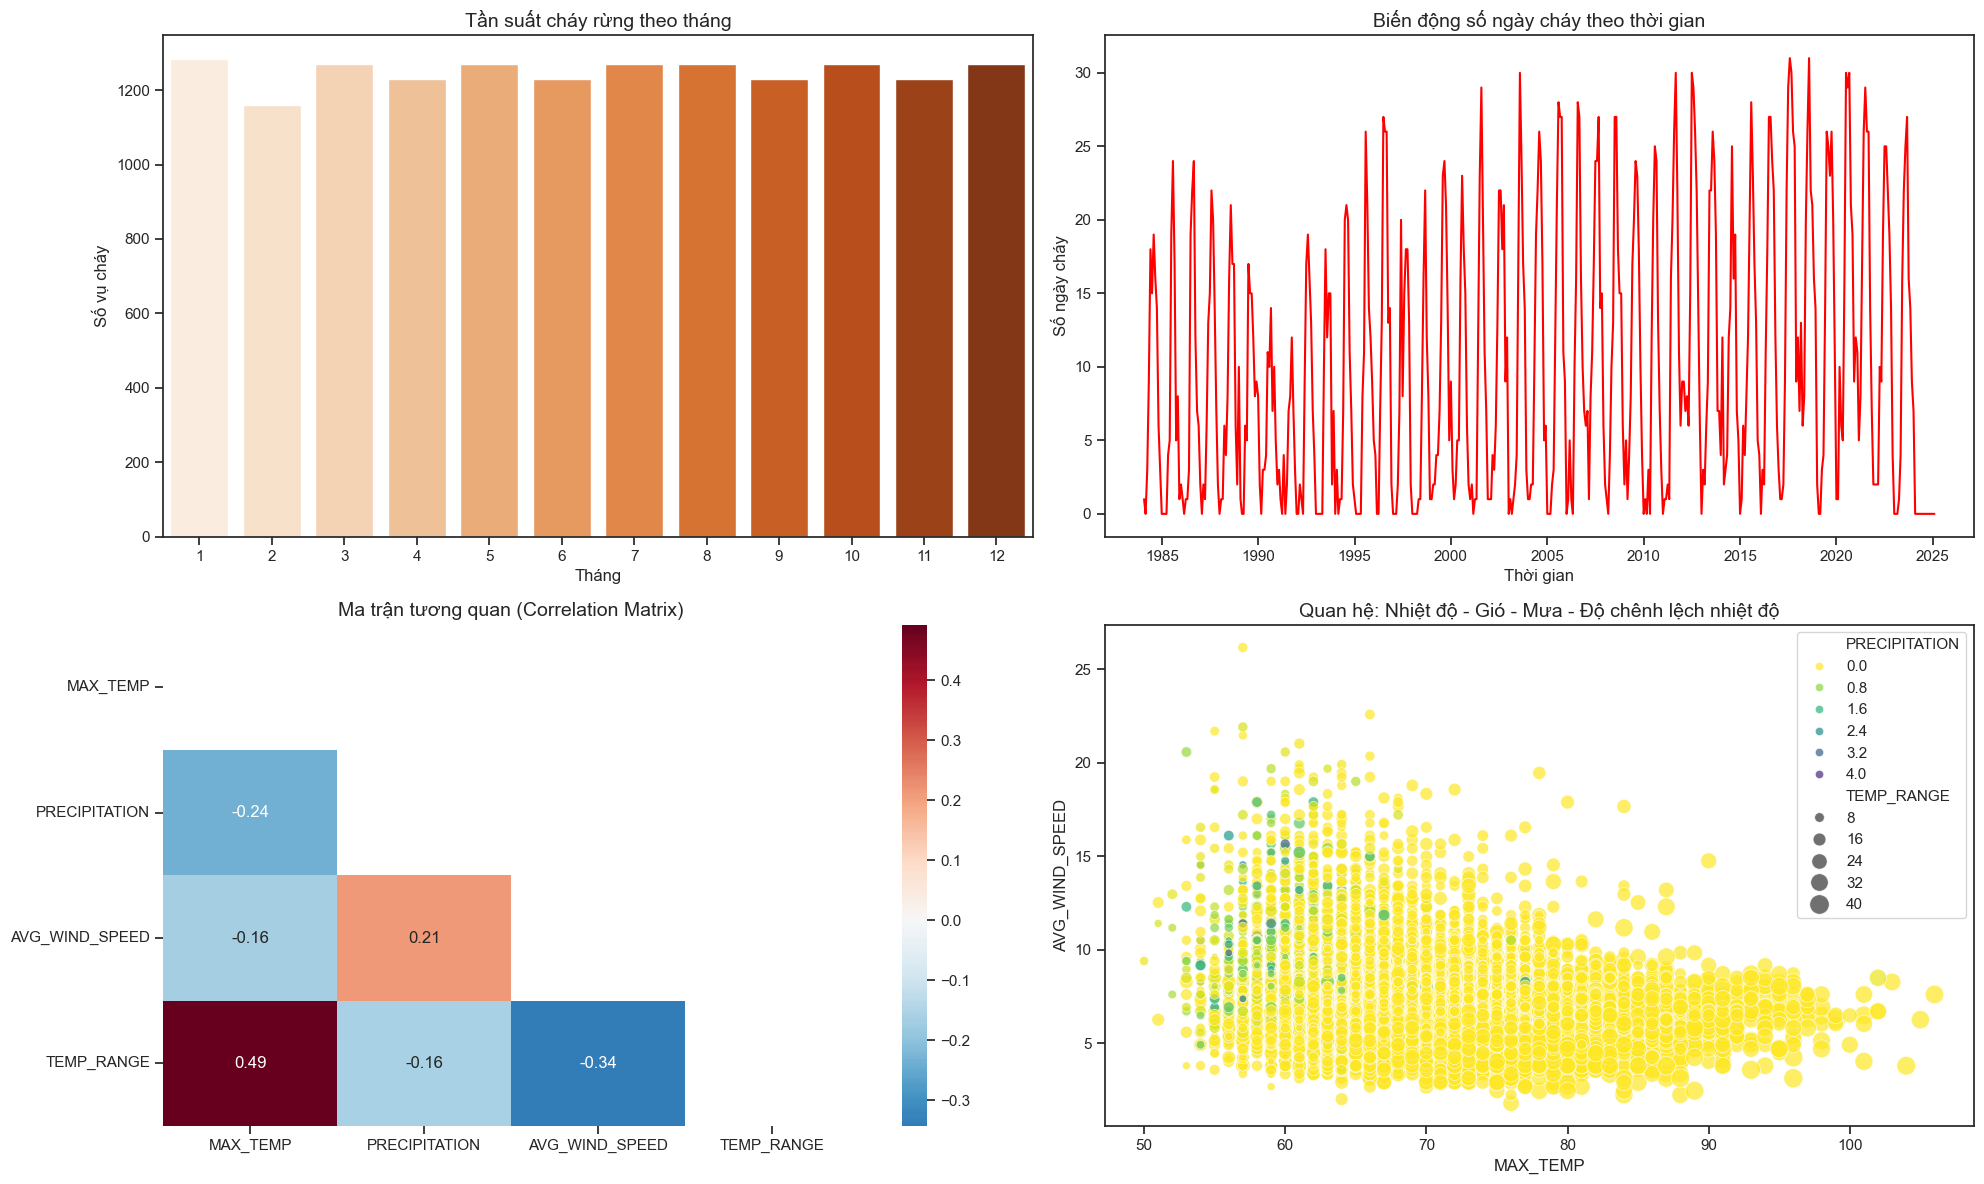

In [4]:
import numpy as np

sns.set(style="ticks")
fig = plt.figure(figsize=(20, 12))

# 1. Biểu đồ theo thời gian (Time-series)
# Đếm số vụ theo tháng
ax1 = plt.subplot(2, 2, 1)
monthly_counts = df.groupby('MONTH').size()
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette="Oranges", ax=ax1)
ax1.set_title('Tần suất cháy rừng theo tháng', fontsize=14)
ax1.set_xlabel('Tháng')
ax1.set_ylabel('Số vụ cháy')

# Tổng số ngày cháy theo thời gian
ax2 = plt.subplot(2, 2, 2)
df['DATE'] = pd.to_datetime(df['DATE'])
monthly_ts = df.set_index('DATE').resample('M')['FIRE_START_DAY'].sum().reset_index()
sns.lineplot(data=monthly_ts, x='DATE', y='FIRE_START_DAY', color='red', ax=ax2)
ax2.set_title('Biến động số ngày cháy theo thời gian', fontsize=14)
ax2.set_xlabel('Thời gian')
ax2.set_ylabel('Số ngày cháy')

# 2. Biểu đồ đa biến (Multivariate)
# Ma trận tương quan
ax3 = plt.subplot(2, 2, 3)
corr_cols = ['MAX_TEMP', 'PRECIPITATION', 'AVG_WIND_SPEED', 'TEMP_RANGE']
corr = df[corr_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) # Che một nửa tam giác
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='RdBu_r', center=0, ax=ax3)
ax3.set_title('Ma trận tương quan (Correlation Matrix)', fontsize=14)

# Biểu đồ phân tán đa chiều (Scatter plot)
ax4 = plt.subplot(2, 2, 4)
sns.scatterplot(
    data=df, 
    x='MAX_TEMP', 
    y='AVG_WIND_SPEED', 
    hue='PRECIPITATION',       # Màu sắc theo lượng mưa
    palette='viridis_r', 
    size='TEMP_RANGE',         # Kích thước theo độ chênh lệch nhiệt độ
    sizes=(20, 200), 
    alpha=0.7, 
    ax=ax4
)
ax4.set_title('Quan hệ: Nhiệt độ - Gió - Mưa - Độ chênh lệch nhiệt độ', fontsize=14)

plt.tight_layout()
plt.show()

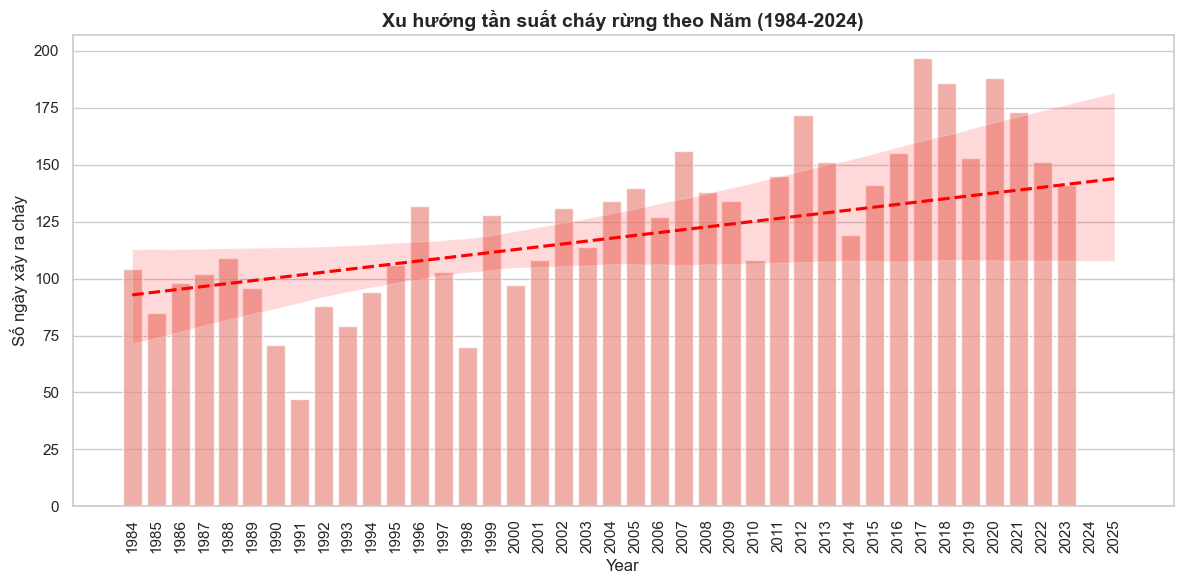

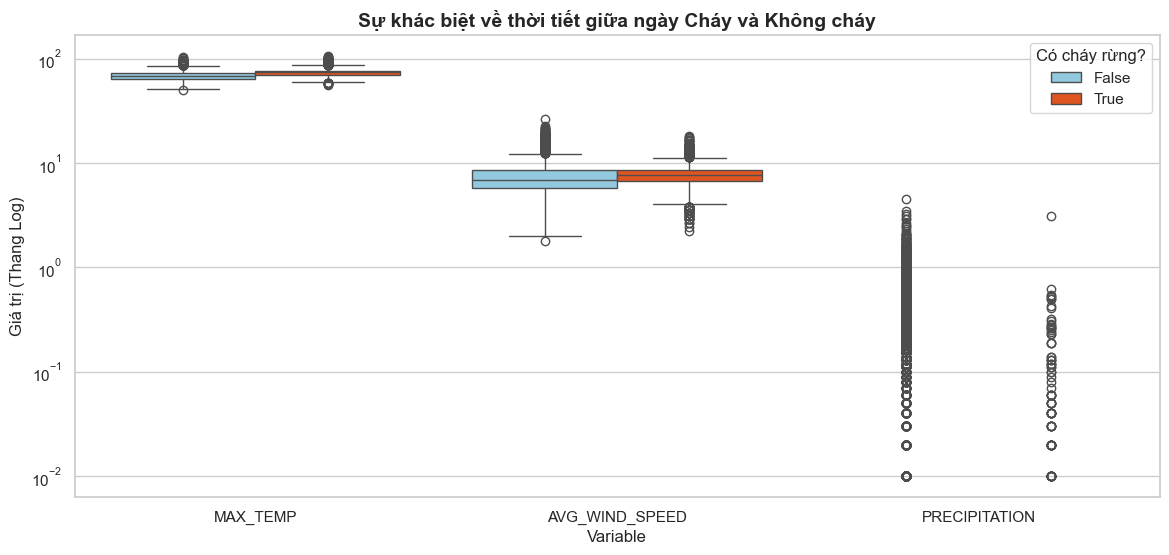

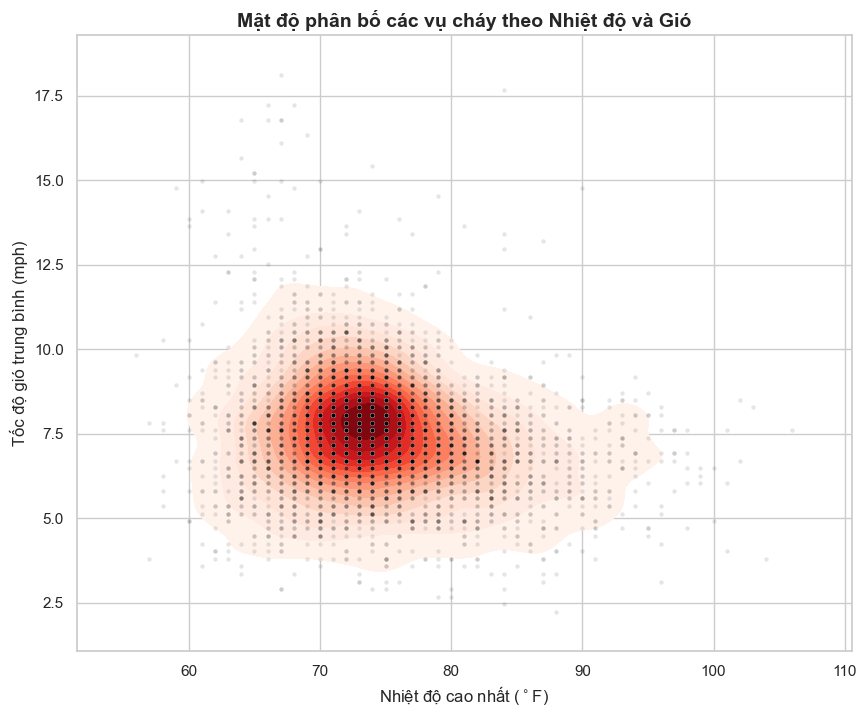

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Đọc dữ liệu
file_path = 'CA_Weather_Fire_Dataset_1984-2025_clean_chacchanluon.csv'
df = pd.read_csv(file_path)

# 2. Xử lý dữ liệu (Quan trọng để tránh lỗi KeyError)
# Chuyển đổi cột DATE sang định dạng datetime chuẩn
df['DATE'] = pd.to_datetime(df['DATE'])
# Tạo thêm các cột thời gian chi tiết
df['Year'] = df['DATE'].dt.year
df['Month'] = df['DATE'].dt.month
df['Day_of_Week'] = df['DATE'].dt.day_name()

# Cấu hình giao diện chung
sns.set(style="whitegrid")

# --- BIỂU ĐỒ 1: Xu hướng theo Năm ---
plt.figure(figsize=(12, 6))
# Đếm số ngày có cháy (True = 1, False = 0)
yearly_fires = df.groupby('Year')['FIRE_START_DAY'].sum().reset_index()

sns.barplot(x='Year', y='FIRE_START_DAY', data=yearly_fires, color='salmon', alpha=0.7)
# Vẽ đường xu hướng
sns.regplot(x=np.arange(len(yearly_fires)), y='FIRE_START_DAY', data=yearly_fires, 
            scatter=False, color='red', line_kws={'linestyle':'--'})
plt.title('Xu hướng tần suất cháy rừng theo Năm (1984-2024)', fontsize=14, fontweight='bold')
plt.ylabel('Số ngày xảy ra cháy')
plt.xticks(rotation=90) # Xoay nhãn năm cho dễ đọc
plt.tight_layout()
plt.show()

# --- BIỂU ĐỒ 2: So sánh điều kiện thời tiết (Boxplot) ---
plt.figure(figsize=(14, 6))
# Chuyển dữ liệu về dạng dọc để vẽ gộp 3 biến
vars_to_compare = ['MAX_TEMP', 'AVG_WIND_SPEED', 'PRECIPITATION']
df_melt = df.melt(id_vars=['FIRE_START_DAY'], value_vars=vars_to_compare, 
                  var_name='Variable', value_name='Value')

# Vẽ Boxplot so sánh True (Cháy) vs False (Không cháy)
sns.boxplot(x='Variable', y='Value', hue='FIRE_START_DAY', data=df_melt, 
            palette={False: 'skyblue', True: 'orangered'})
plt.yscale('log') # Dùng thang Log để nhìn rõ biến Mưa (Precipitation)
plt.title('Sự khác biệt về thời tiết giữa ngày Cháy và Không cháy', fontsize=14, fontweight='bold')
plt.ylabel('Giá trị (Thang Log)')
plt.legend(title='Có cháy rừng?')
plt.show()

# --- BIỂU ĐỒ 3: Vùng nguy hiểm (Density Plot) ---
# Lọc ra chỉ những ngày có cháy
fire_days = df[df['FIRE_START_DAY'] == True]

plt.figure(figsize=(10, 8))
# Vẽ mật độ (vùng màu đậm)
sns.kdeplot(data=fire_days, x='MAX_TEMP', y='AVG_WIND_SPEED', 
            fill=True, cmap="Reds", levels=15, thresh=0.05)
# Vẽ thêm các điểm mờ để thấy chi tiết
sns.scatterplot(data=fire_days, x='MAX_TEMP', y='AVG_WIND_SPEED', 
                alpha=0.1, color='black', s=10)
plt.title('Mật độ phân bố các vụ cháy theo Nhiệt độ và Gió', fontsize=14, fontweight='bold')
plt.xlabel('Nhiệt độ cao nhất ($^\circ$F)')
plt.ylabel('Tốc độ gió trung bình (mph)')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3576\4243072530.py:17: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_stats = df.resample('Y').agg({


Multivariate time-series charts generated.


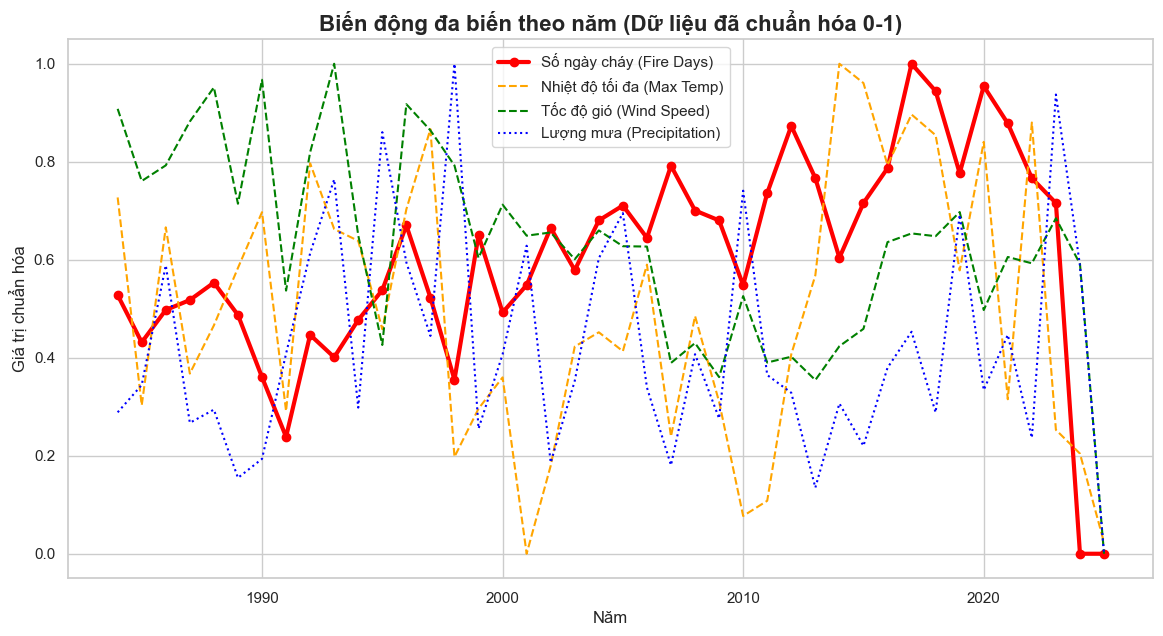

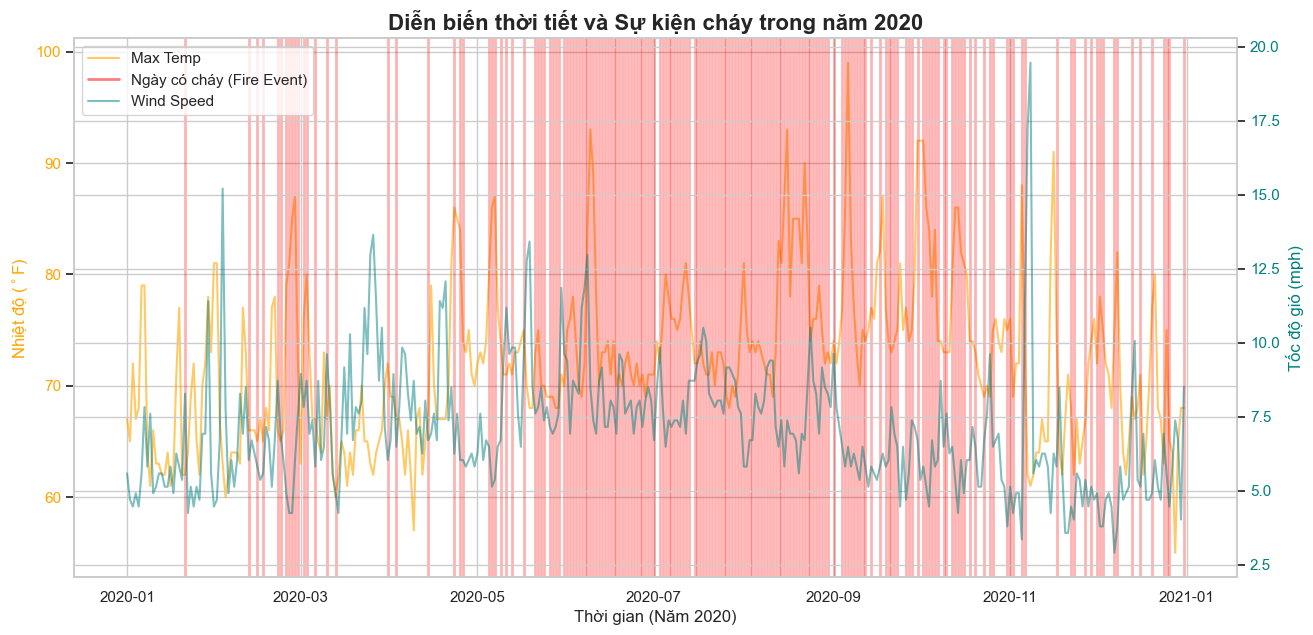

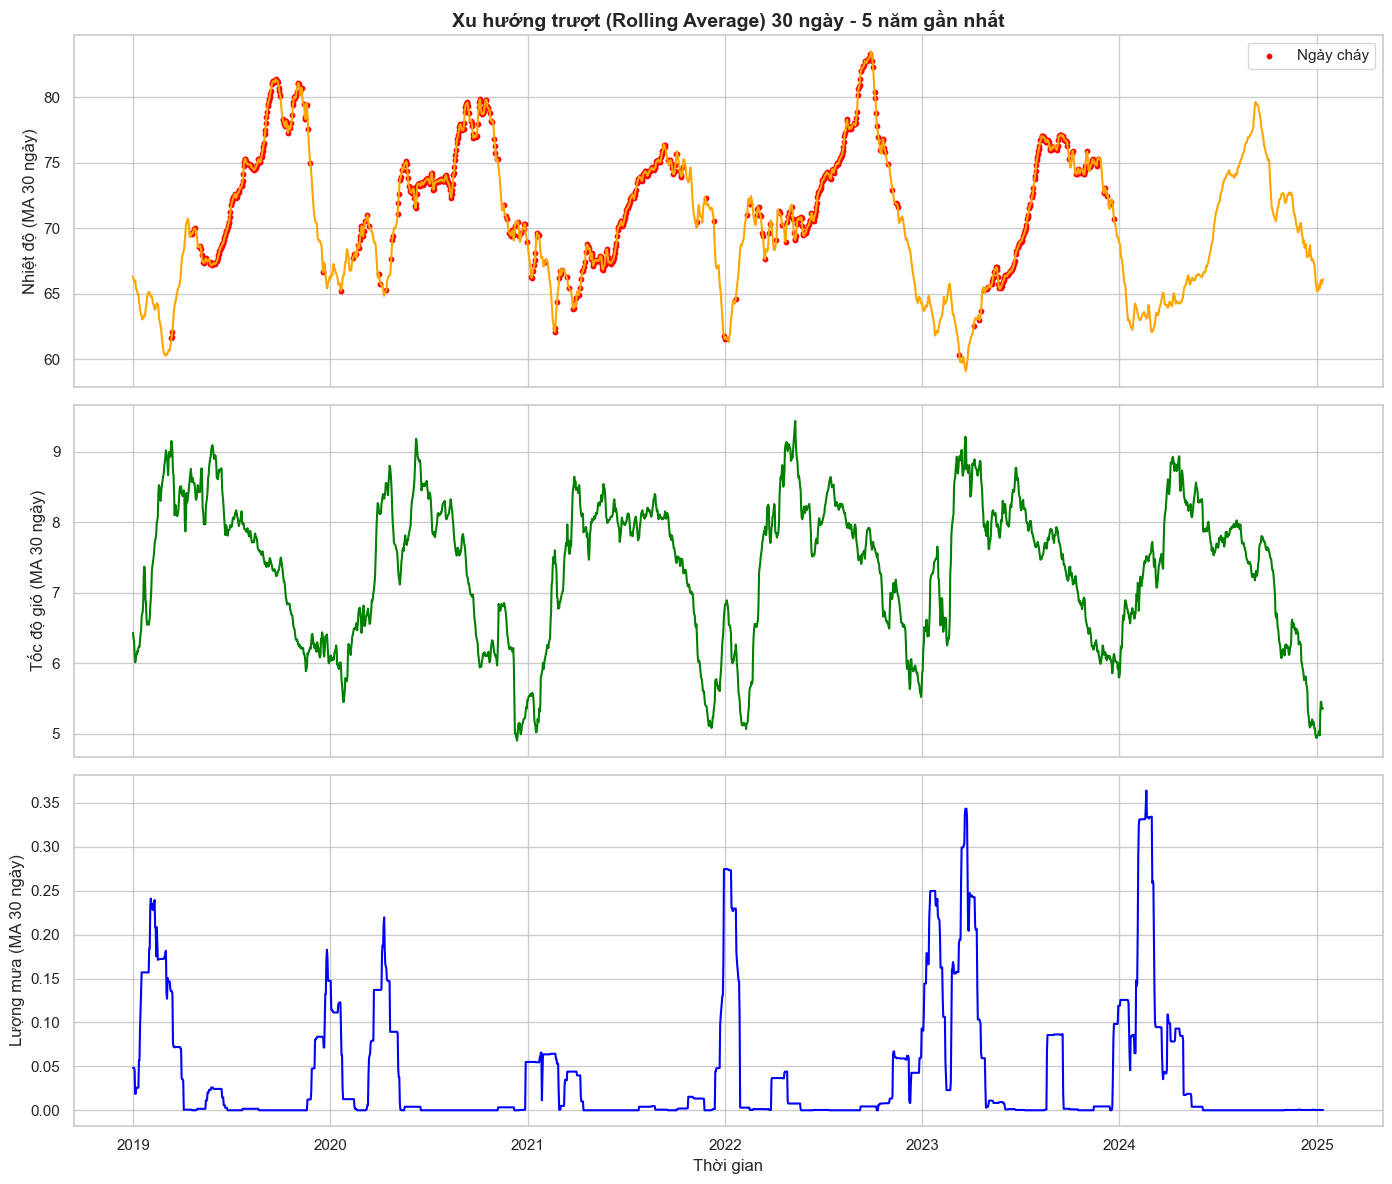

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data
file_path = 'CA_Weather_Fire_Dataset_1984-2025_clean_chacchanluon.csv'
df = pd.read_csv(file_path)
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.set_index('DATE').sort_index()

# Setup style
sns.set(style="whitegrid")

# --- CHART 1: Yearly Multivariate Trend (Macro View) ---
# Aggregate data by year
yearly_stats = df.resample('Y').agg({
    'MAX_TEMP': 'mean',
    'AVG_WIND_SPEED': 'mean',
    'PRECIPITATION': 'sum',
    'FIRE_START_DAY': 'sum'  # Count of fire days
})
yearly_stats.index = yearly_stats.index.year

# Normalize data to compare trends on the same scale (Min-Max Scaling)
normalized_yearly = (yearly_stats - yearly_stats.min()) / (yearly_stats.max() - yearly_stats.min())

plt.figure(figsize=(14, 7))
plt.plot(normalized_yearly.index, normalized_yearly['FIRE_START_DAY'], label='Số ngày cháy (Fire Days)', color='red', linewidth=3, marker='o')
plt.plot(normalized_yearly.index, normalized_yearly['MAX_TEMP'], label='Nhiệt độ tối đa (Max Temp)', color='orange', linestyle='--')
plt.plot(normalized_yearly.index, normalized_yearly['AVG_WIND_SPEED'], label='Tốc độ gió (Wind Speed)', color='green', linestyle='--')
plt.plot(normalized_yearly.index, normalized_yearly['PRECIPITATION'], label='Lượng mưa (Precipitation)', color='blue', linestyle=':')

plt.title('Biến động đa biến theo năm (Dữ liệu đã chuẩn hóa 0-1)', fontsize=16, fontweight='bold')
plt.xlabel('Năm')
plt.ylabel('Giá trị chuẩn hóa')
plt.legend()
plt.savefig('multivariate_yearly_trend.png')

# --- CHART 2: Micro View - Weather & Fires in a Specific Extreme Year (e.g., 2020) ---
target_year = 2020
df_year = df[df.index.year == target_year]

fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot Temperature
ax1.plot(df_year.index, df_year['MAX_TEMP'], color='orange', alpha=0.6, label='Max Temp')
ax1.set_xlabel('Thời gian (Năm 2020)')
ax1.set_ylabel('Nhiệt độ ($^\circ$F)', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Create a second y-axis for Wind Speed
ax2 = ax1.twinx()
ax2.plot(df_year.index, df_year['AVG_WIND_SPEED'], color='teal', alpha=0.5, label='Wind Speed')
ax2.set_ylabel('Tốc độ gió (mph)', color='teal')
ax2.tick_params(axis='y', labelcolor='teal')

# Highlight Fire Days
fire_dates = df_year[df_year['FIRE_START_DAY'] == True].index
for date in fire_dates:
    ax1.axvline(x=date, color='red', alpha=0.3, linewidth=2, ymin=0, ymax=1)

# Add a dummy line for legend
ax1.plot([], [], color='red', alpha=0.5, linewidth=2, label='Ngày có cháy (Fire Event)')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title(f'Diễn biến thời tiết và Sự kiện cháy trong năm {target_year}', fontsize=16, fontweight='bold')
plt.savefig('micro_view_2020.png')

# --- CHART 3: Seasonal Rolling Averages (Trend Decomposition) ---
# Calculate 30-day rolling average to smooth out daily noise
df['Temp_Rolling'] = df['MAX_TEMP'].rolling(window=30).mean()
df['Wind_Rolling'] = df['AVG_WIND_SPEED'].rolling(window=30).mean()
df['Precip_Rolling'] = df['PRECIPITATION'].rolling(window=30).mean()

# Filter last 5 years for clearer view
df_recent = df[df.index.year >= 2019]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

ax1.plot(df_recent.index, df_recent['Temp_Rolling'], color='orange')
ax1.set_ylabel('Nhiệt độ (MA 30 ngày)')
ax1.set_title('Xu hướng trượt (Rolling Average) 30 ngày - 5 năm gần nhất', fontsize=14, fontweight='bold')
# Mark fire seasons roughly
fire_days_recent = df_recent[df_recent['FIRE_START_DAY'] == True].index
ax1.scatter(fire_days_recent, df_recent.loc[fire_days_recent, 'Temp_Rolling'], color='red', s=10, label='Ngày cháy')
ax1.legend()

ax2.plot(df_recent.index, df_recent['Wind_Rolling'], color='green')
ax2.set_ylabel('Tốc độ gió (MA 30 ngày)')

ax3.plot(df_recent.index, df_recent['Precip_Rolling'], color='blue')
ax3.set_ylabel('Lượng mưa (MA 30 ngày)')
ax3.set_xlabel('Thời gian')

plt.tight_layout()
plt.savefig('rolling_trends.png')

print("Multivariate time-series charts generated.")

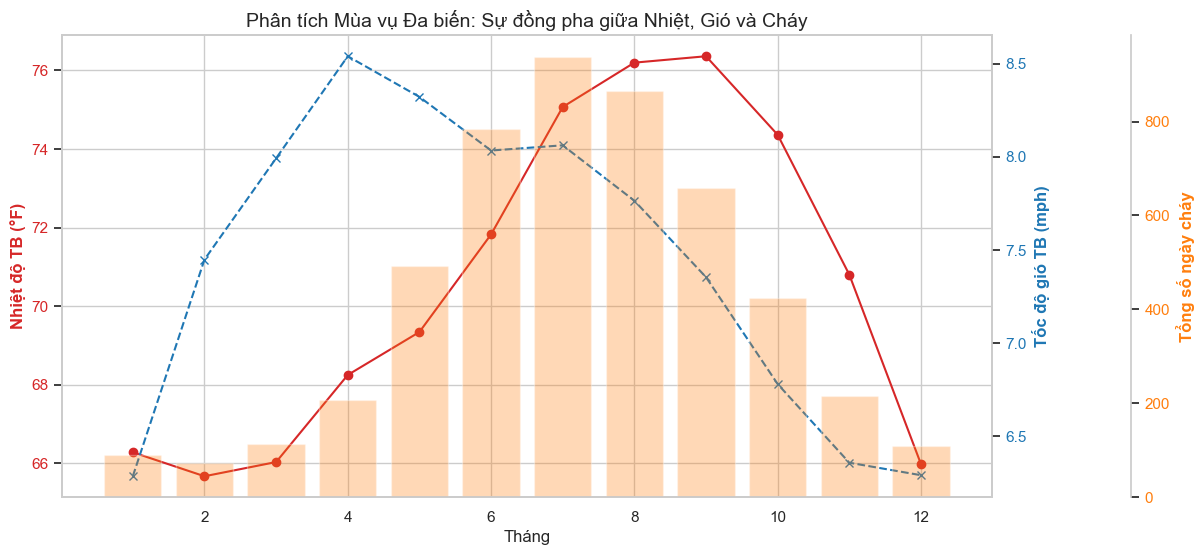

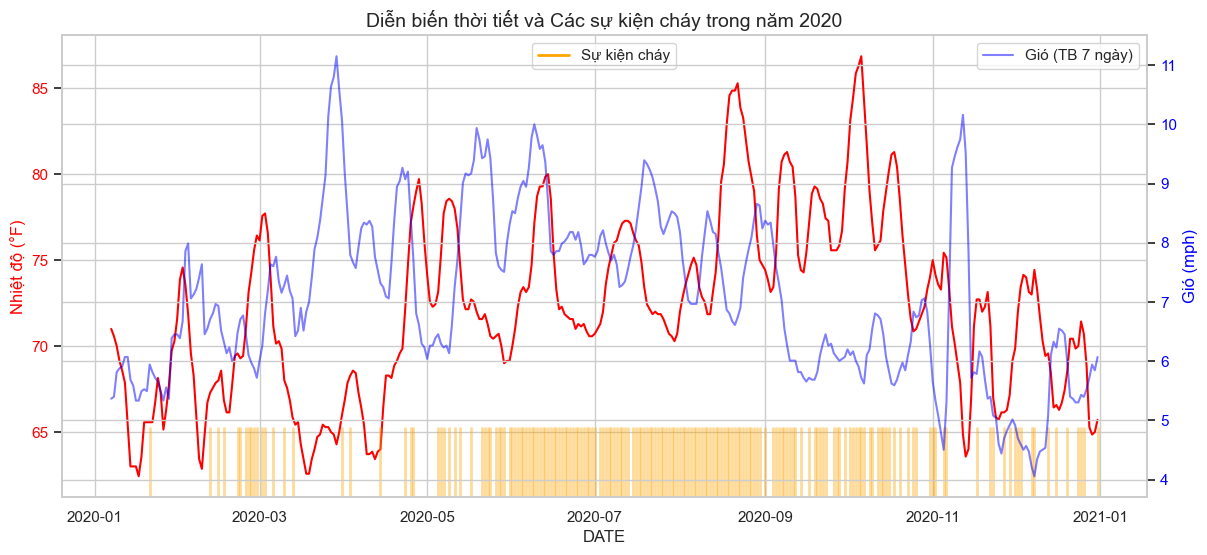

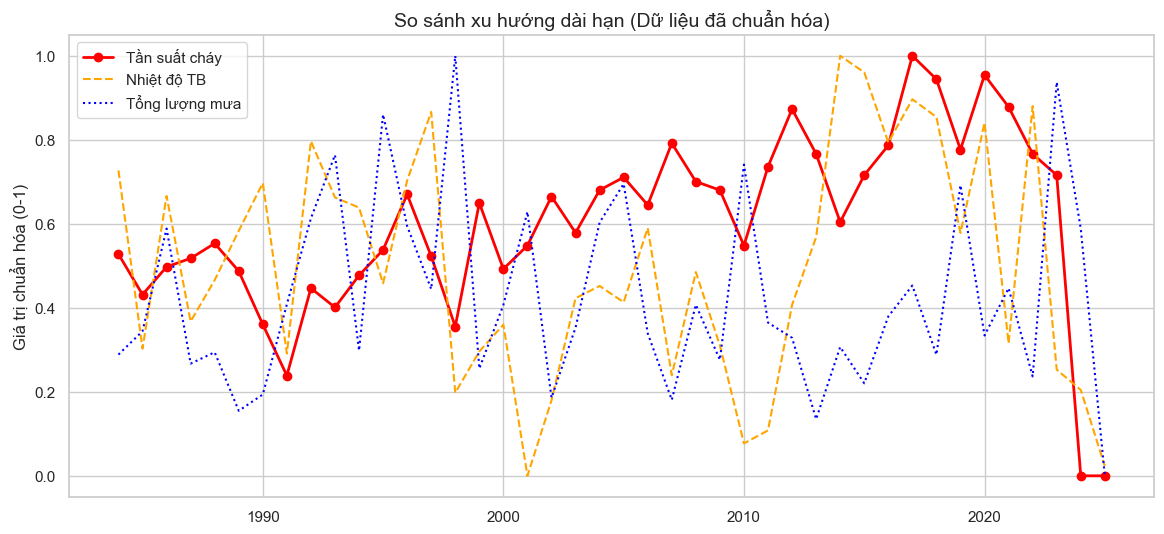

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# 1. ĐỌC VÀ XỬ LÝ DỮ LIỆU
file_path = 'CA_Weather_Fire_Dataset_1984-2025_clean_chacchanluon.csv'  # Đổi tên file nếu cần
df = pd.read_csv(file_path)
df['DATE'] = pd.to_datetime(df['DATE'])
df['Year'] = df['DATE'].dt.year
df['Month'] = df['DATE'].dt.month

sns.set(style="whitegrid")

# --- BIỂU ĐỒ 1: Mùa vụ Đa biến (3 Trục Y) ---
# Gom nhóm theo tháng
monthly_stats = df.groupby('Month').agg({
    'MAX_TEMP': 'mean',
    'AVG_WIND_SPEED': 'mean',
    'FIRE_START_DAY': 'sum'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Trục 1: Nhiệt độ (Đường đỏ)
color = 'tab:red'
ax1.set_xlabel('Tháng')
ax1.set_ylabel('Nhiệt độ TB (°F)', color=color, fontweight='bold')
ax1.plot(monthly_stats['Month'], monthly_stats['MAX_TEMP'], color=color, marker='o', label='Nhiệt độ')
ax1.tick_params(axis='y', labelcolor=color)

# Trục 2: Gió (Đường xanh)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Tốc độ gió TB (mph)', color=color, fontweight='bold')
ax2.plot(monthly_stats['Month'], monthly_stats['AVG_WIND_SPEED'], color=color, marker='x', linestyle='--', label='Gió')
ax2.tick_params(axis='y', labelcolor=color)

# Trục 3: Số ngày cháy (Cột cam) - Dùng kỹ thuật "offset spine"
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.15)) # Đẩy trục thứ 3 ra xa một chút
ax3.set_ylabel('Tổng số ngày cháy', color='tab:orange', fontweight='bold')
ax3.bar(monthly_stats['Month'], monthly_stats['FIRE_START_DAY'], color='tab:orange', alpha=0.3, label='Ngày cháy')
ax3.tick_params(axis='y', labelcolor='tab:orange')
# Ẩn lưới cho trục phụ để đỡ rối
ax2.grid(False)
ax3.grid(False)

plt.title('Phân tích Mùa vụ Đa biến: Sự đồng pha giữa Nhiệt, Gió và Cháy', fontsize=14)
plt.show()


# --- BIỂU ĐỒ 2: Chi tiết chuỗi thời gian năm điển hình (Ví dụ: 2020) ---
year_zoom = 2020
df_sub = df[df['Year'] == year_zoom].sort_values('DATE').set_index('DATE')

# Tính trung bình trượt 7 ngày (Rolling Average) để làm mượt biểu đồ
df_sub['Roll_Temp'] = df_sub['MAX_TEMP'].rolling(window=7).mean()
df_sub['Roll_Wind'] = df_sub['AVG_WIND_SPEED'].rolling(window=7).mean()

fig, ax = plt.subplots(figsize=(14, 6))

# Vẽ Nhiệt độ và Gió trên 2 trục
sns.lineplot(data=df_sub, x=df_sub.index, y='Roll_Temp', color='red', label='Nhiệt độ (TB 7 ngày)', ax=ax)
ax.set_ylabel('Nhiệt độ (°F)', color='red')
ax.tick_params(axis='y', labelcolor='red')

ax2 = ax.twinx()
sns.lineplot(data=df_sub, x=df_sub.index, y='Roll_Wind', color='blue', label='Gió (TB 7 ngày)', ax=ax2, alpha=0.5)
ax2.set_ylabel('Gió (mph)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Đánh dấu các ngày CÓ CHÁY (Vạch màu cam dưới đáy)
fire_dates = df_sub[df_sub['FIRE_START_DAY'] == True].index
for date in fire_dates:
    ax.axvline(date, color='orange', alpha=0.4, ymin=0, ymax=0.15, linewidth=2)

plt.title(f'Diễn biến thời tiết và Các sự kiện cháy trong năm {year_zoom}', fontsize=14)
# Tạo chú thích giả cho sự kiện cháy
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='orange', lw=2)]
ax.legend(custom_lines, ['Sự kiện cháy'], loc='upper center')
plt.show()


# --- BIỂU ĐỒ 3: Xu hướng dài hạn (Chuẩn hóa Min-Max) ---
# Gom nhóm theo năm
yearly_stats = df.groupby('Year').agg({
    'MAX_TEMP': 'mean',
    'PRECIPITATION': 'sum',
    'FIRE_START_DAY': 'sum'
}).reset_index()

# Chuẩn hóa dữ liệu về khoảng [0, 1] để so sánh xu hướng
scaler = MinMaxScaler()
cols = ['MAX_TEMP', 'PRECIPITATION', 'FIRE_START_DAY']
yearly_norm = yearly_stats.copy()
yearly_norm[cols] = scaler.fit_transform(yearly_norm[cols])

plt.figure(figsize=(14, 6))
plt.plot(yearly_norm['Year'], yearly_norm['FIRE_START_DAY'], marker='o', color='red', linewidth=2, label='Tần suất cháy')
plt.plot(yearly_norm['Year'], yearly_norm['MAX_TEMP'], linestyle='--', color='orange', label='Nhiệt độ TB')
plt.plot(yearly_norm['Year'], yearly_norm['PRECIPITATION'], linestyle=':', color='blue', label='Tổng lượng mưa')

plt.title('So sánh xu hướng dài hạn (Dữ liệu đã chuẩn hóa)', fontsize=14)
plt.ylabel('Giá trị chuẩn hóa (0-1)')
plt.legend()
plt.show()

      Total Precipitation  Avg Max Temp  Avg Wind Speed  Fire Days Count
YEAR                                                                    
1984                 7.81     71.592896        8.086038              104
1985                 9.32     69.528767        7.720603               85
1986                15.93     71.295890        7.799863               98
1987                 7.23     69.843836        8.021699              102
1988                 7.96     70.322404        8.194754              109


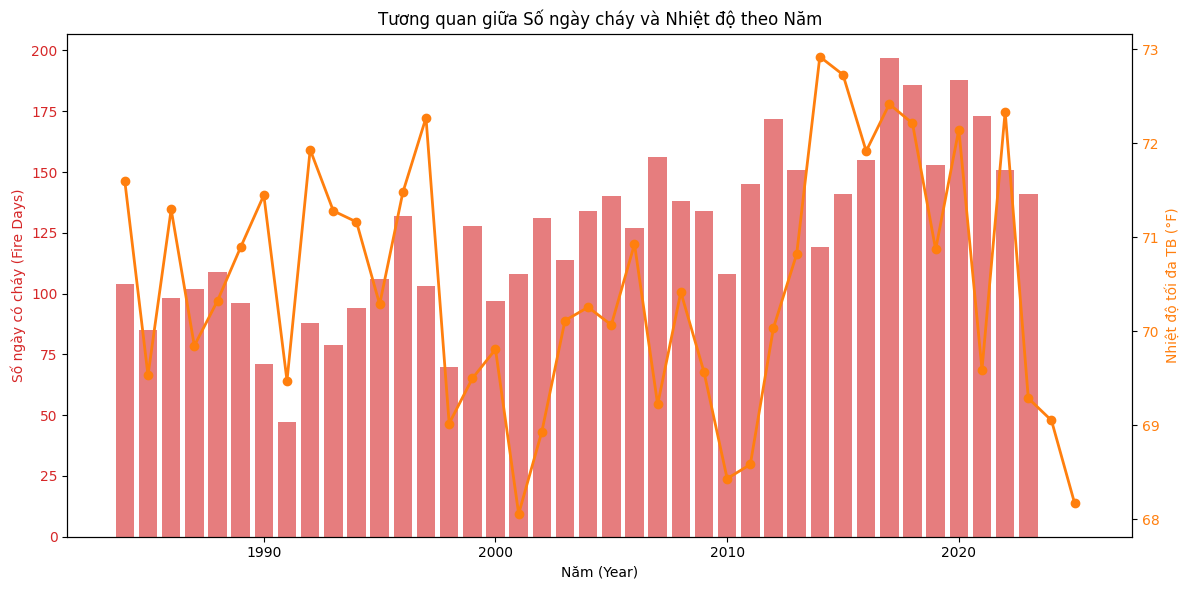

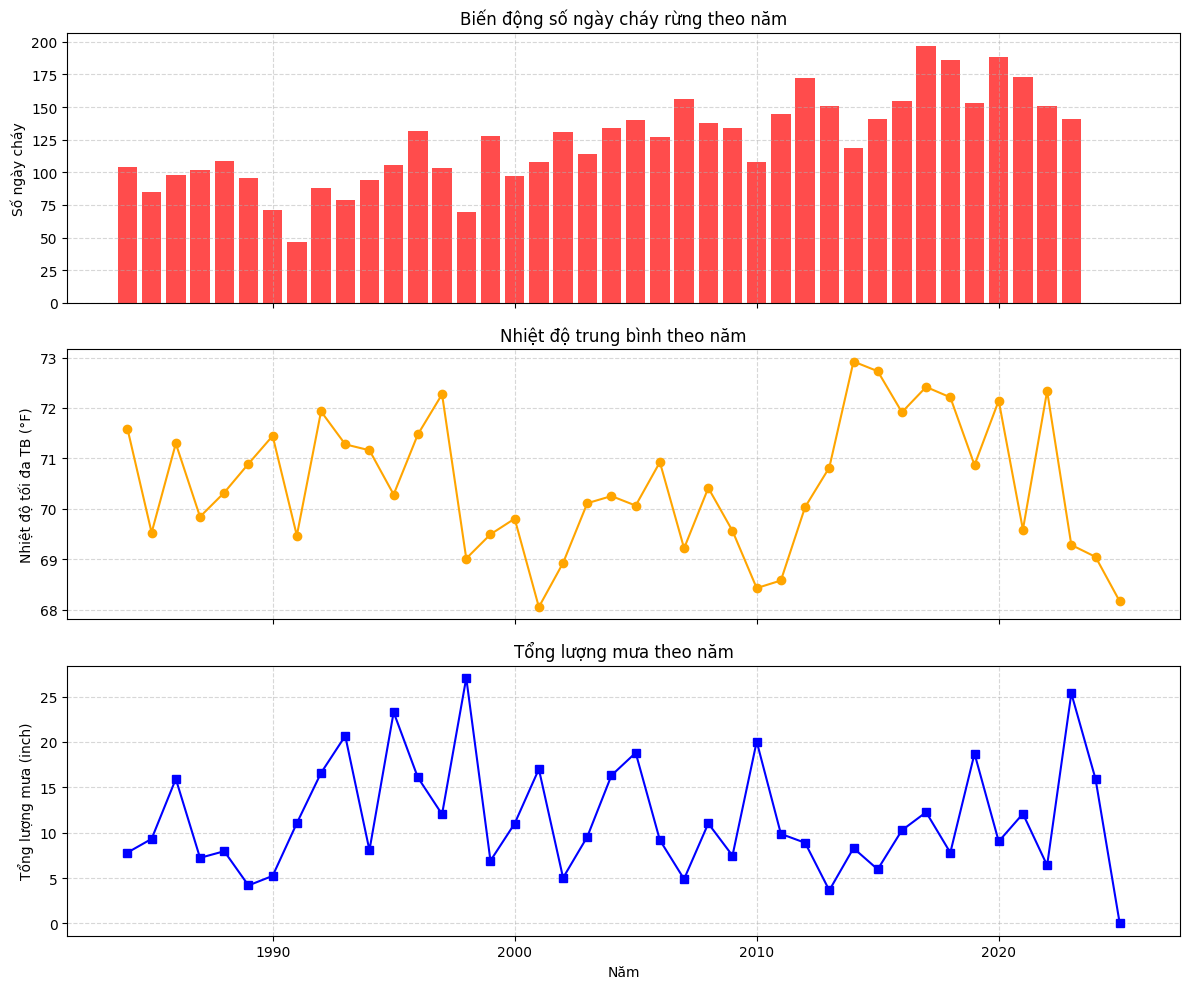

In [2]:
import matplotlib.pyplot as plt

# Convert DATE to datetime just in case, though we have YEAR column
df['DATE'] = pd.to_datetime(df['DATE'])

# Aggregate data by YEAR
df_yearly = df.groupby('YEAR').agg({
    'PRECIPITATION': 'sum',
    'MAX_TEMP': 'mean',
    'AVG_WIND_SPEED': 'mean',
    'FIRE_START_DAY': 'sum'  # Sum of boolean is the count of True values
}).rename(columns={
    'PRECIPITATION': 'Total Precipitation',
    'MAX_TEMP': 'Avg Max Temp',
    'AVG_WIND_SPEED': 'Avg Wind Speed',
    'FIRE_START_DAY': 'Fire Days Count'
})

# Plotting
# We will create a figure with subplots to show multiple variables
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Fire Days Count as Bars on primary y-axis
color = 'tab:red'
ax1.set_xlabel('Năm (Year)')
ax1.set_ylabel('Số ngày có cháy (Fire Days)', color=color)
bars = ax1.bar(df_yearly.index, df_yearly['Fire Days Count'], color=color, alpha=0.6, label='Fire Days')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Temperature
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Nhiệt độ tối đa TB (°F)', color=color)
line1, = ax2.plot(df_yearly.index, df_yearly['Avg Max Temp'], color=color, marker='o', linewidth=2, label='Avg Max Temp')
ax2.tick_params(axis='y', labelcolor=color)

# Create a third y-axis for Precipitation (using offset spine)
# To avoid clutter, let's keep it to 2 axes first or use subplots.
# Let's switch to subplots for clearer multivariate analysis as requested in previous turn.

plt.title('Tương quan giữa Số ngày cháy và Nhiệt độ theo Năm')
fig.tight_layout()
plt.savefig('fire_temp_dual_axis.png')

# --- Option 2: Subplots for all variables ---
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 10), sharex=True)

# Plot Fire Days
axes[0].bar(df_yearly.index, df_yearly['Fire Days Count'], color='red', alpha=0.7)
axes[0].set_ylabel('Số ngày cháy')
axes[0].set_title('Biến động số ngày cháy rừng theo năm')
axes[0].grid(True, linestyle='--', alpha=0.5)

# Plot Avg Max Temp
axes[1].plot(df_yearly.index, df_yearly['Avg Max Temp'], color='orange', marker='o')
axes[1].set_ylabel('Nhiệt độ tối đa TB (°F)')
axes[1].set_title('Nhiệt độ trung bình theo năm')
axes[1].grid(True, linestyle='--', alpha=0.5)

# Plot Precipitation
axes[2].plot(df_yearly.index, df_yearly['Total Precipitation'], color='blue', marker='s', linestyle='-')
axes[2].set_ylabel('Tổng lượng mưa (inch)')
axes[2].set_title('Tổng lượng mưa theo năm')
axes[2].grid(True, linestyle='--', alpha=0.5)
axes[2].set_xlabel('Năm')

plt.tight_layout()
plt.savefig('multivariate_subplots.png')

print(df_yearly.head())